In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('res.log', sep='\t')
fdf = df.groupby(['Nat', 'CS']).apply(lambda x: x['Diff'].abs().max()) #.apply(lambda x: x.sort_values(by='Na'))

pdf = pd.DataFrame()

for idx in fdf.index:
    tmp = {}
    data = fdf.loc[idx]
    pdf.loc[idx[0], idx[1]] = data

<AxesSubplot:>

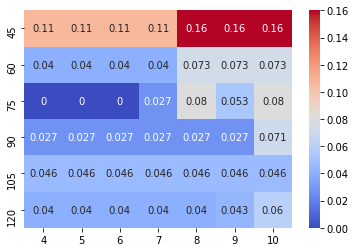

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pdf, annot=True, cmap='coolwarm')

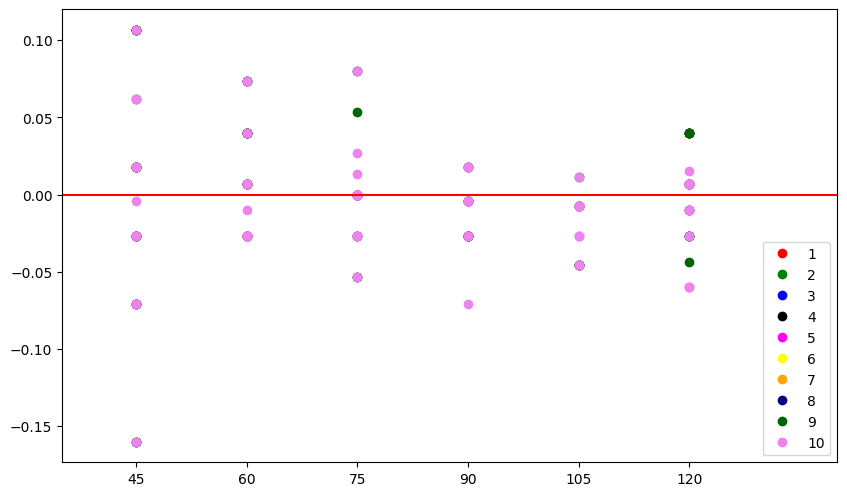

In [4]:
import numpy as np

colors = {1:'red',2:'green',3:'blue',4:'black',5:'magenta',6:'yellow',7:'orange',8:'navy',9:'darkgreen',10:'violet'}

sdf = df.groupby(['Nat', 'CS']).apply(lambda x: x.sort_values('Nat'))

fig = plt.figure(figsize=(10,6), dpi=100)

for idx_1 in sdf.index.get_level_values(0).unique():
    for idx_2 in sdf.loc[idx_1].index.get_level_values(0).unique():
        xes = sdf.loc[(idx_1, idx_2), 'Nat'].to_list()
        ycs = sdf.loc[(idx_1, idx_2), 'Diff'].to_list()
        plt.plot(xes,ycs,'o', color=colors[idx_2]) #, label=idx_2)
for i in colors:
    plt.plot([0],[0],'o', color=colors[i], label=i)

plt.legend()

plt.xlim((sdf['Nat'].min()-10), (sdf['Nat'].max()+20))
plt.axhline(0, color='red')
plt.xticks(np.arange((sdf['Nat'].min()), (sdf['Nat'].max())+1, 15))

plt.show()